In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

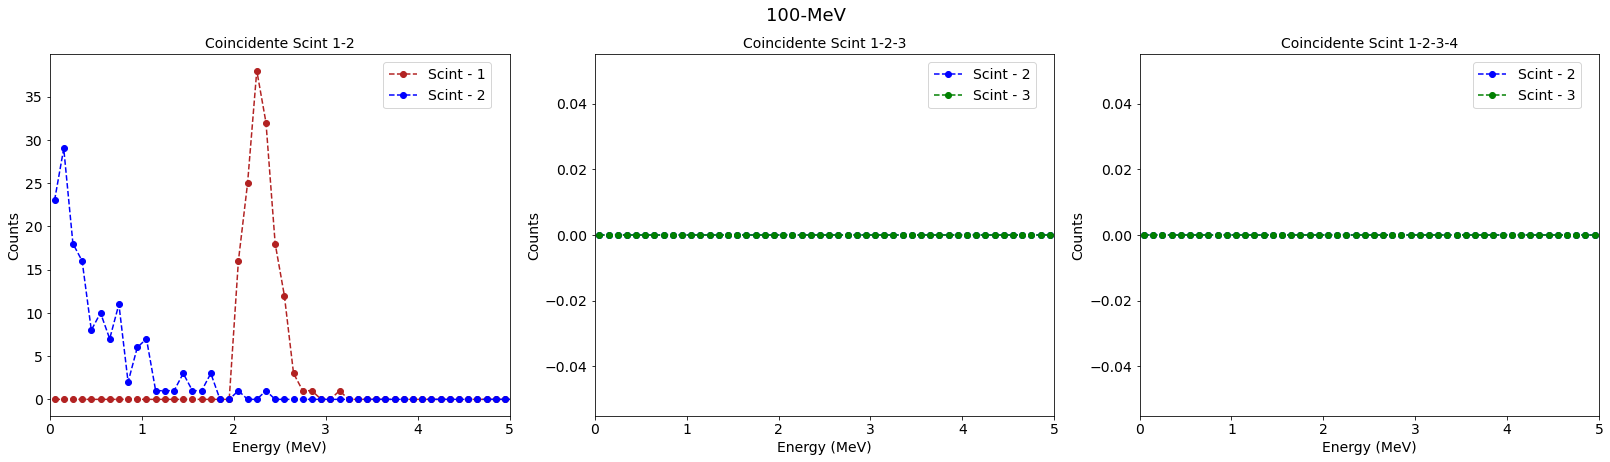

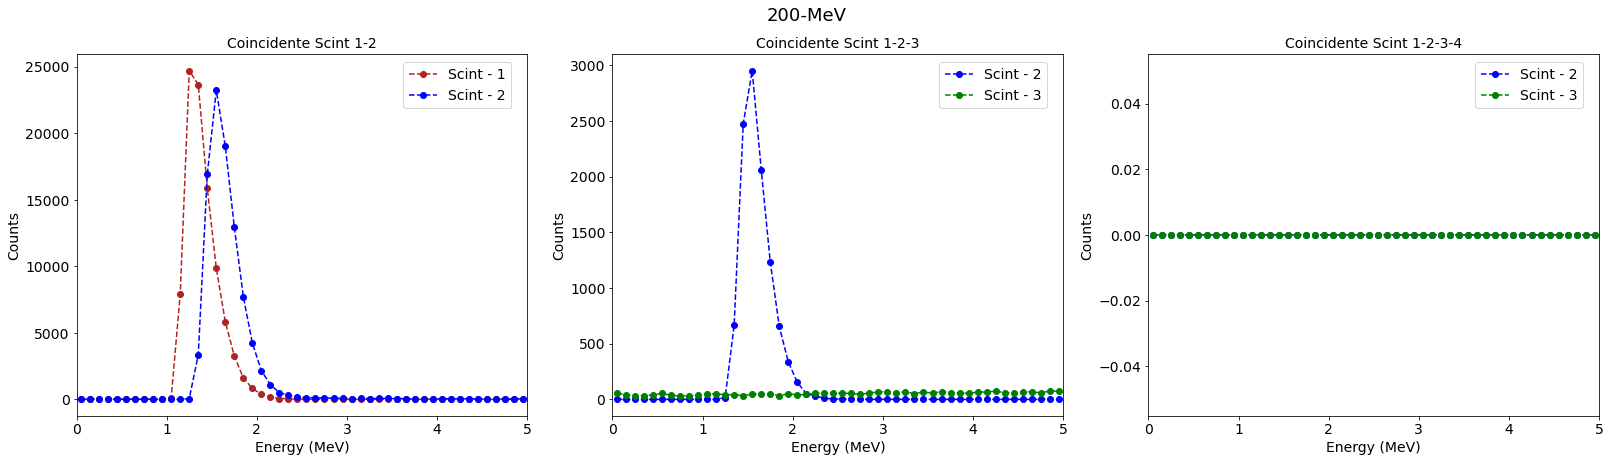

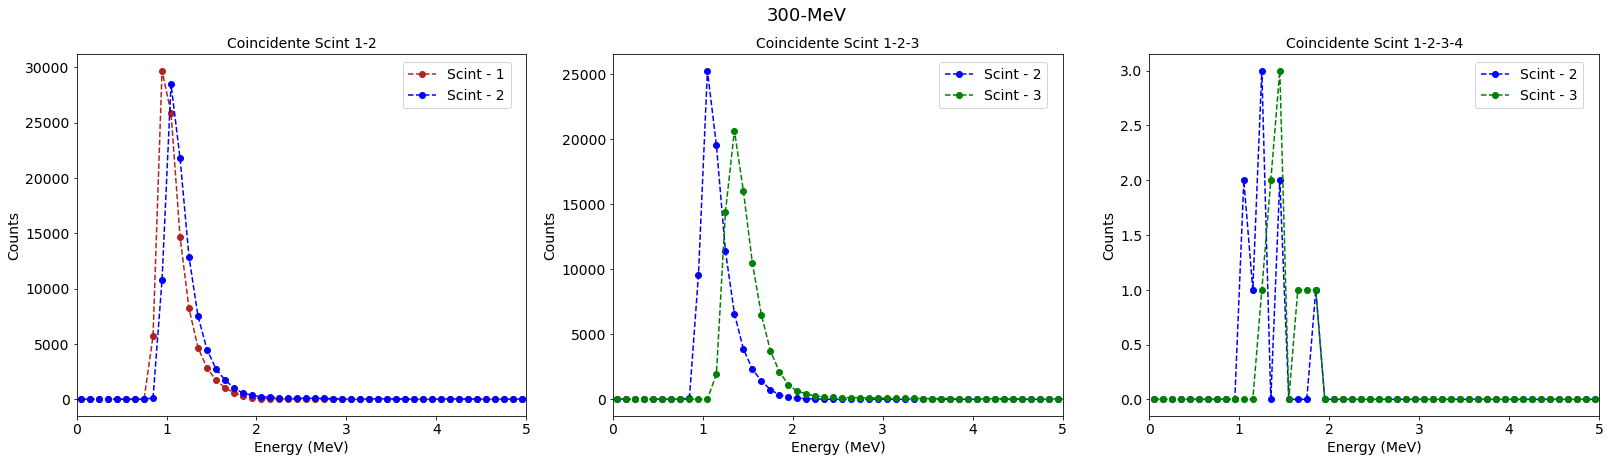

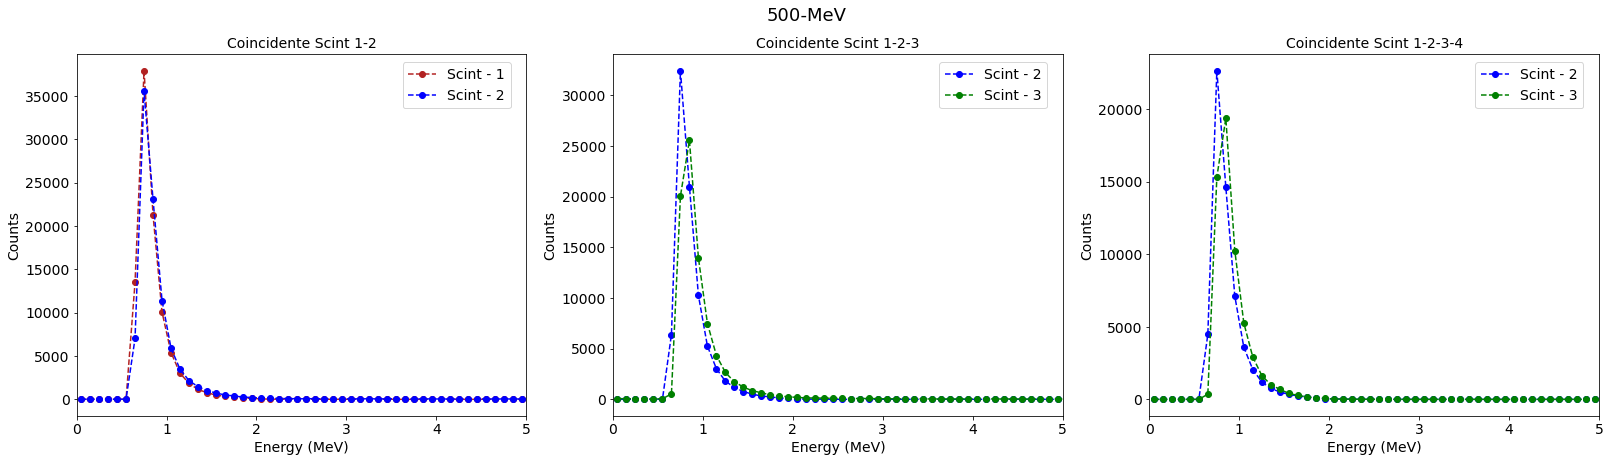

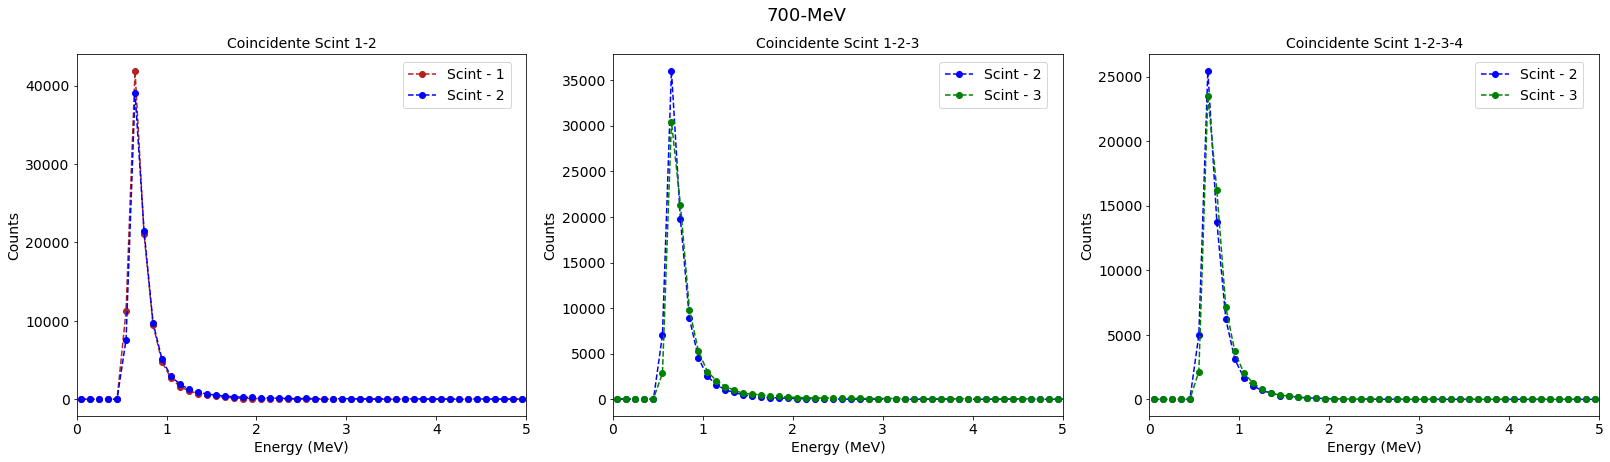

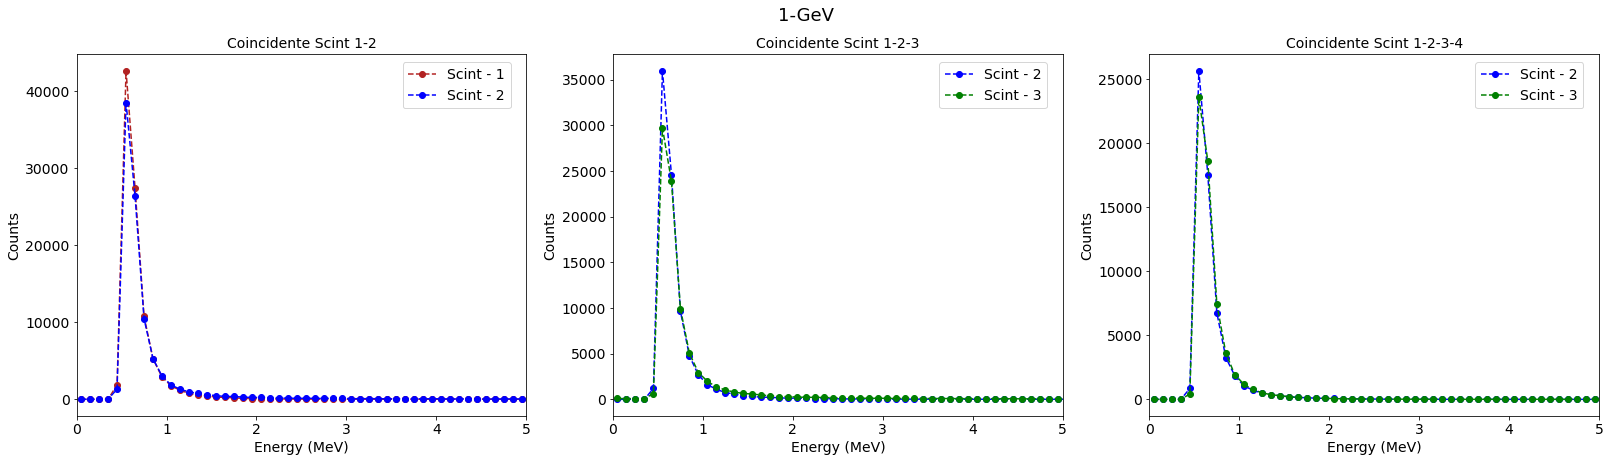

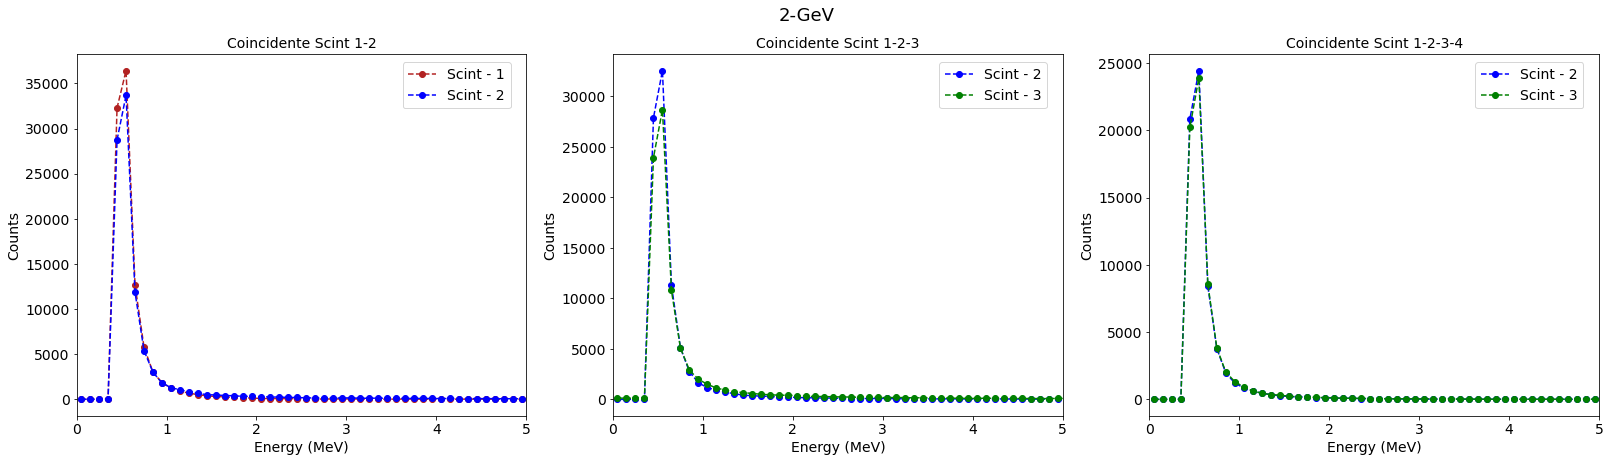

In [29]:
bins = np.array(pd.read_csv("proton/beam/100-MeV/EDep1-Scint1-2.txt", 
                            header=None, sep=";")[0])

energy_names = ["100-MeV", "200-MeV", "300-MeV", "500-MeV", "700-MeV", "1-GeV", "2-GeV"]
c = ["firebrick", "blue", "blue", "green", "blue", "green"]
scints = ["Scint - 1", "Scint - 2", "Scint - 2", "Scint - 3", "Scint - 2", "Scint - 3"]
titles = ["Coincidente Scint 1-2", "Coincidente Scint 1-2-3", "Coincidente Scint 1-2-3-4"]

figs = []
for name in energy_names:
    fig, axes = plt.subplots(1,3)
    
    edep_ls = ["EDep1-Scint1-2", "EDep2-Scint1-2", "EDep2-Scint1-2-3", "EDep3-Scint1-2-3",
                "EDep2-Scint1-2-3-4", "EDep3-Scint1-2-3-4"]

    fig.suptitle("{}".format(name), fontsize = 18)
    for i in range(0,3):
        edep_1_name = "proton/beam/{}/{}.txt".format(name, edep_ls[2*i])
        
        edep_2_name = "proton/beam/{}/{}.txt".format(name, edep_ls[2*i+1])

        edep_1 = np.array(pd.read_csv(edep_1_name, header=None, sep=";")[1])
        edep_2 = np.array(pd.read_csv(edep_2_name, header=None, sep=";")[1])

        axes[i].set_xlim([0, 5])

        axes[i].set_xlabel("Energy (MeV)", fontsize=14)
        axes[i].set_ylabel("Counts", fontsize=14)

        axes[i].tick_params(axis='both', which='major', labelsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=14)
        
        axes[i].plot(bins, edep_1, "--o", color = c[2*i], label = scints[2*i])
        axes[i].plot(bins, edep_2, "--o", color = c[2*i+1], label = scints[2*i + 1])
        
        axes[i].set_title(titles[i], fontsize = 14)
        axes[i].legend(loc=(0.725,0.85), fontsize = 14)

    fig.set_size_inches(22.5, 6.5)
    fig.tight_layout()
    
    figs.append(fig)

fig.savefig("proton.pdf")
plt.show()

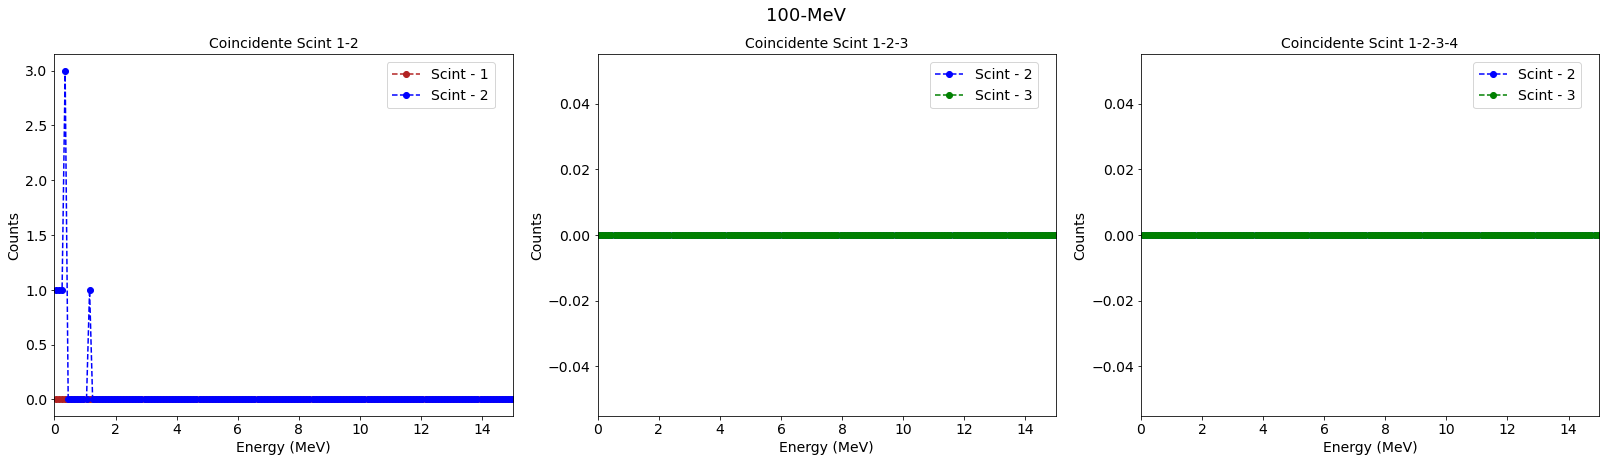

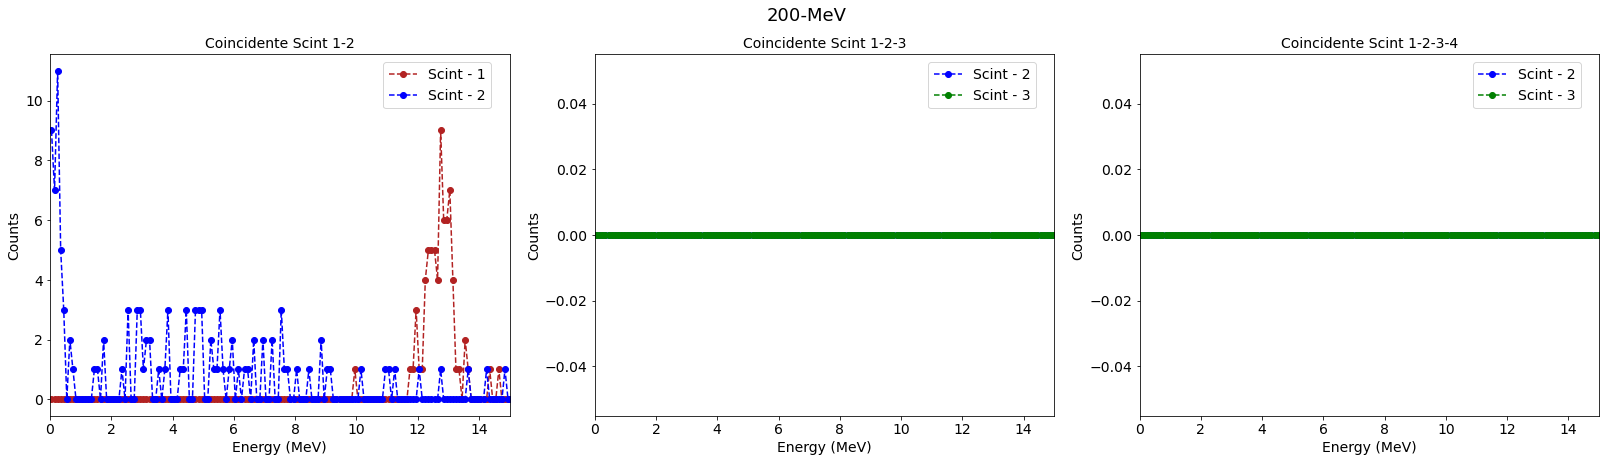

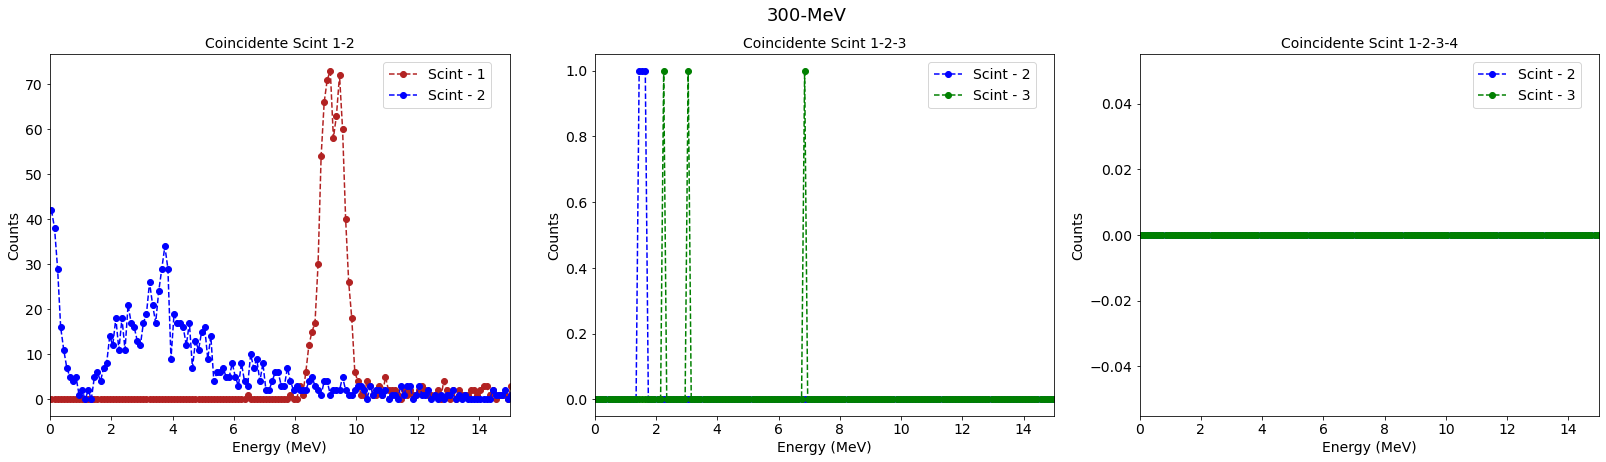

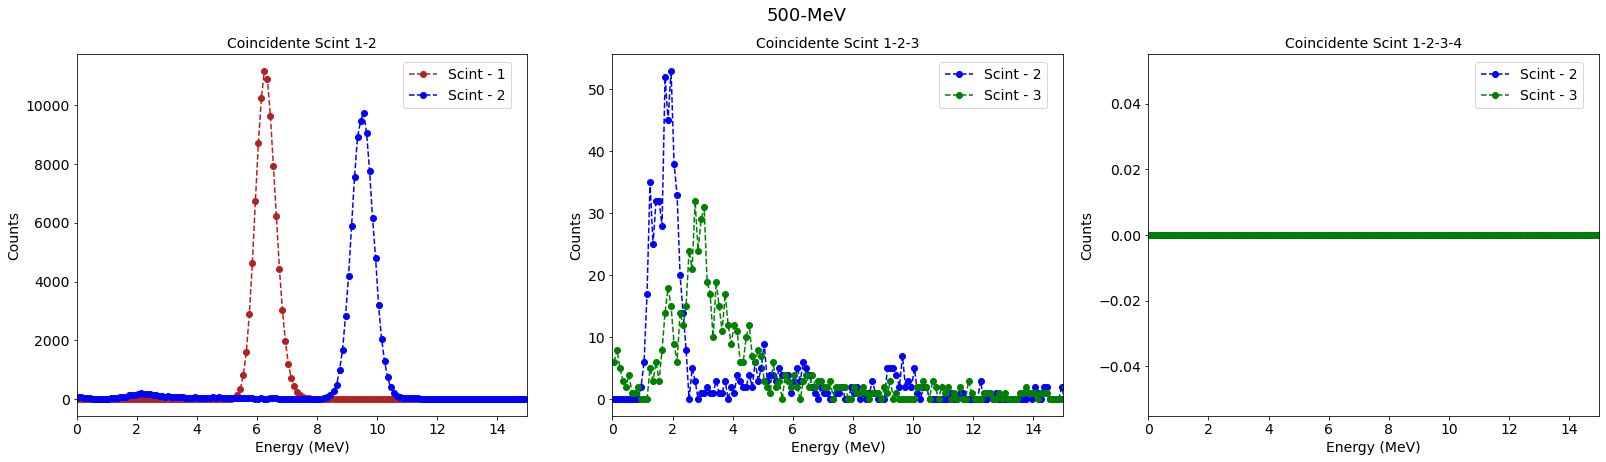

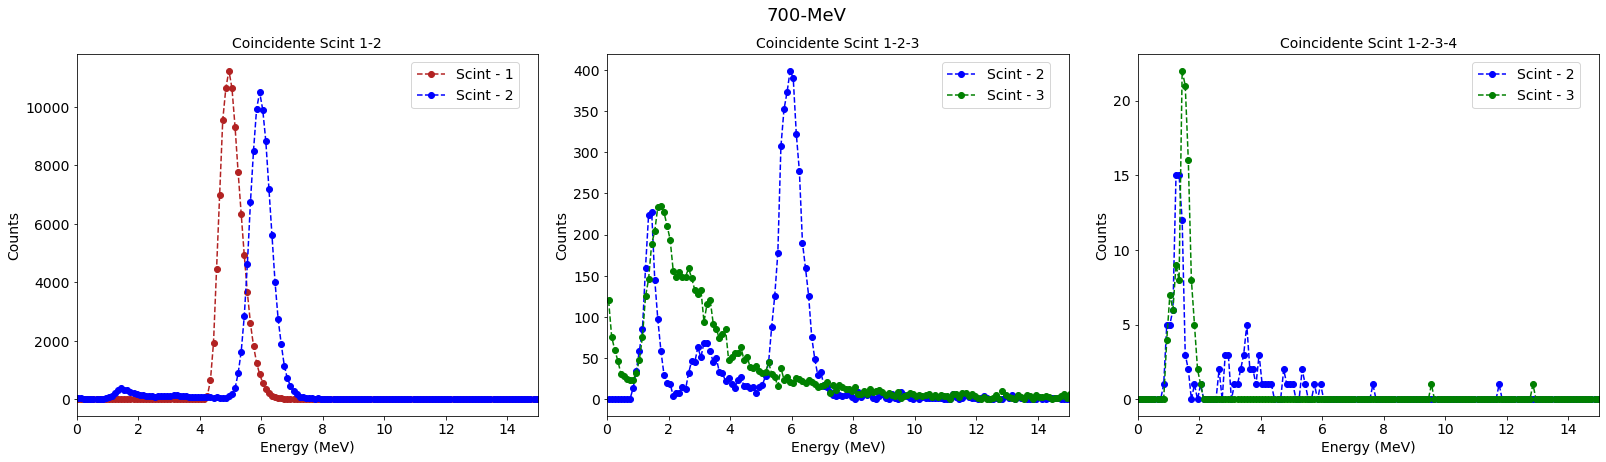

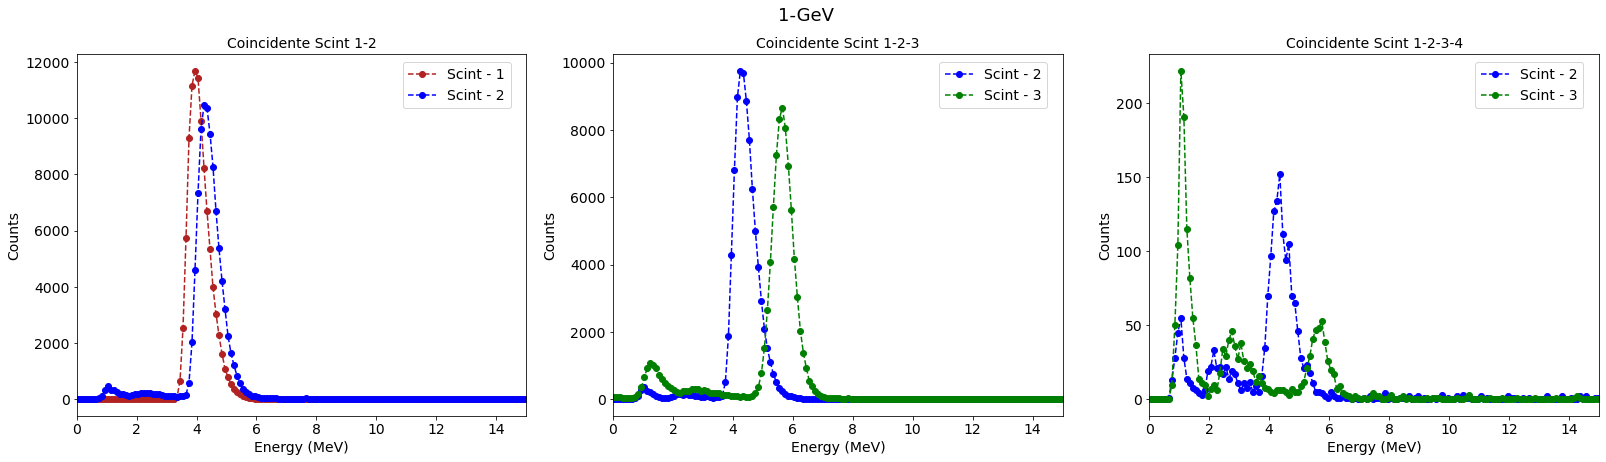

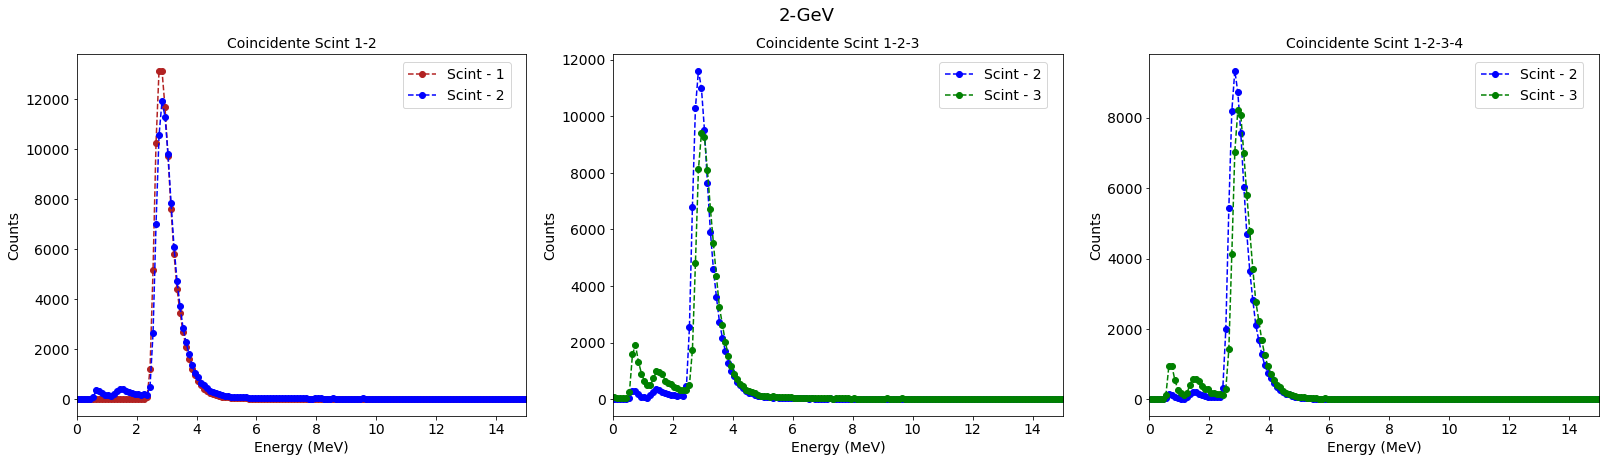

In [31]:
bins = np.array(pd.read_csv("he_3/beam/100-MeV/EDep1-Scint1-2.txt", 
                            header=None, sep=";")[0])

energy_names = ["100-MeV", "200-MeV", "300-MeV", "500-MeV", "700-MeV", "1-GeV", "2-GeV"]
c = ["firebrick", "blue", "blue", "green", "blue", "green"]
scints = ["Scint - 1", "Scint - 2", "Scint - 2", "Scint - 3", "Scint - 2", "Scint - 3"]
titles = ["Coincidente Scint 1-2", "Coincidente Scint 1-2-3", "Coincidente Scint 1-2-3-4"]

for name in energy_names:
    fig, axes = plt.subplots(1,3)
    
    edep_ls = ["EDep1-Scint1-2", "EDep2-Scint1-2", "EDep2-Scint1-2-3", "EDep3-Scint1-2-3",
                "EDep2-Scint1-2-3-4", "EDep3-Scint1-2-3-4"]

    fig.suptitle("{}".format(name), fontsize = 18)
    for i in range(0,3):
        edep_1_name = "he_3/beam/{}/{}.txt".format(name, edep_ls[2*i])
        
        edep_2_name = "he_3/beam/{}/{}.txt".format(name, edep_ls[2*i+1])

        edep_1 = np.array(pd.read_csv(edep_1_name, header=None, sep=";")[1])
        edep_2 = np.array(pd.read_csv(edep_2_name, header=None, sep=";")[1])

        axes[i].set_xlim([0, 15])

        axes[i].set_xlabel("Energy (MeV)", fontsize=14)
        axes[i].set_ylabel("Counts", fontsize=14)

        axes[i].tick_params(axis='both', which='major', labelsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=14)
        
        axes[i].plot(bins, edep_1, "--o", color = c[2*i], label = scints[2*i])
        axes[i].plot(bins, edep_2, "--o", color = c[2*i+1], label = scints[2*i + 1])
        
        axes[i].set_title(titles[i], fontsize = 14)
        axes[i].legend(loc=(0.725,0.85), fontsize = 14)

    fig.set_size_inches(22.5, 6.5)
    fig.tight_layout()
    
plt.show()

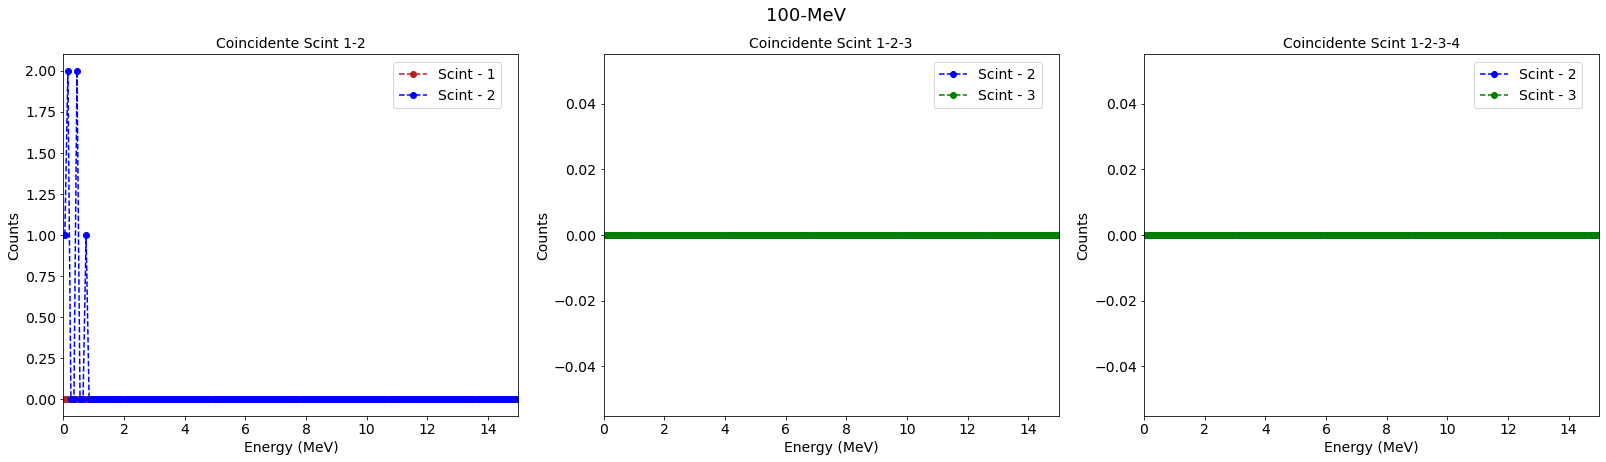

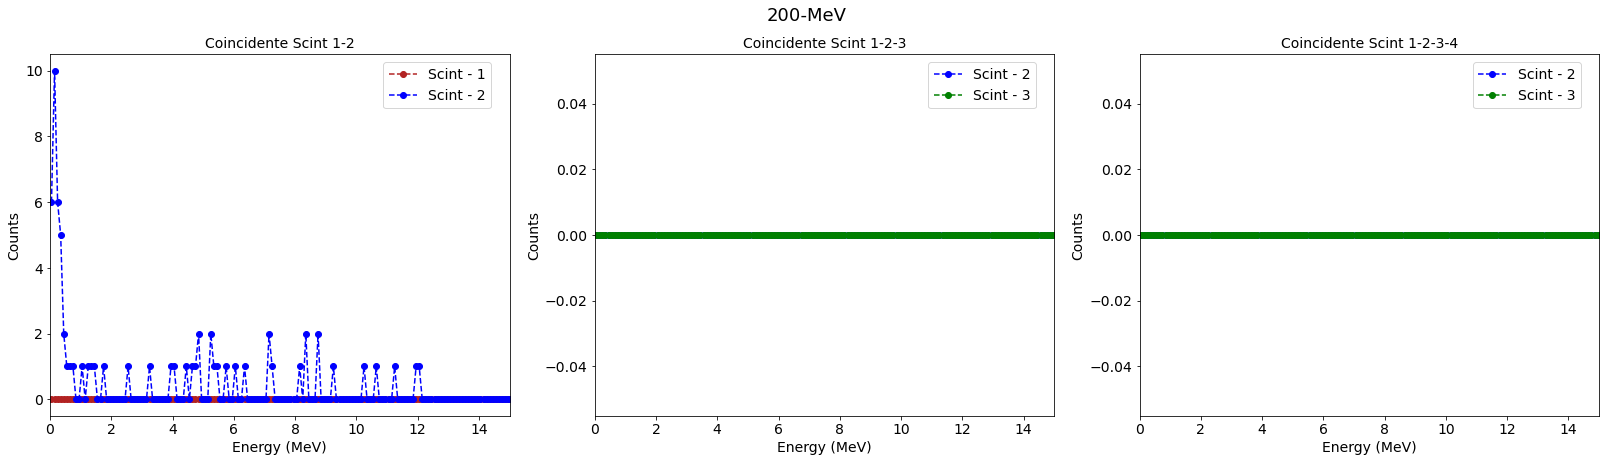

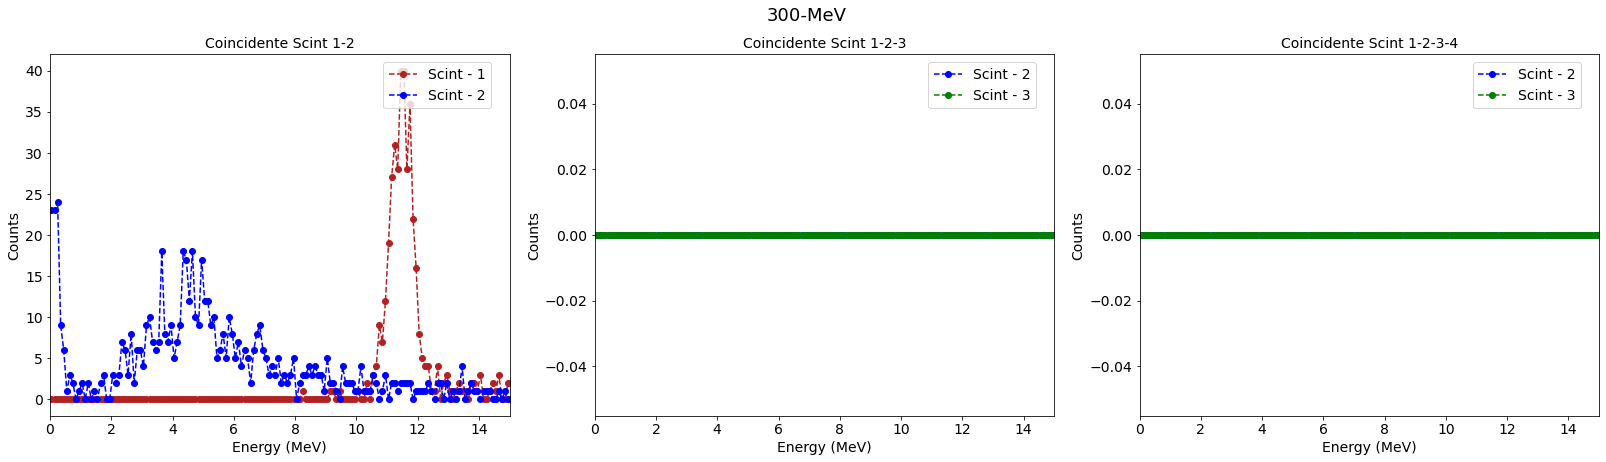

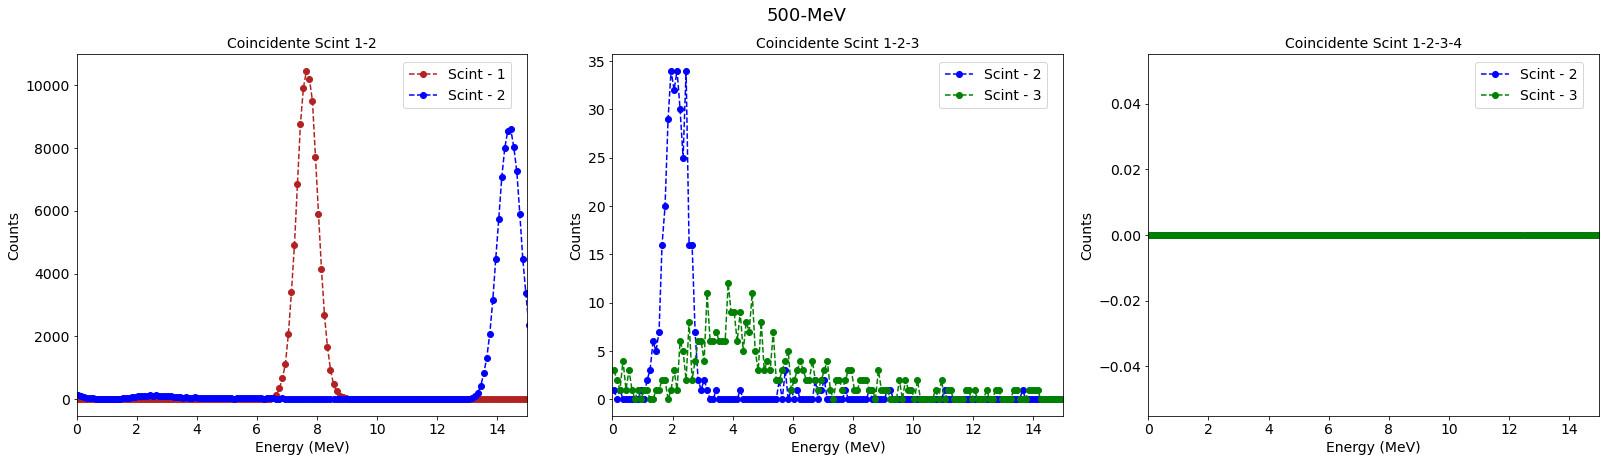

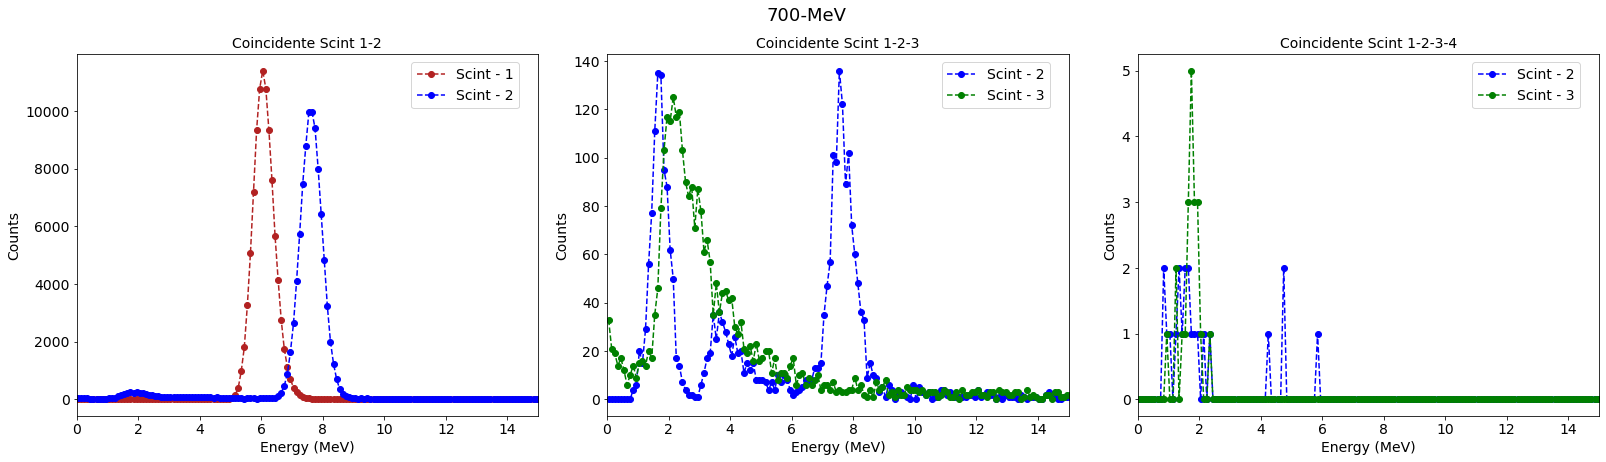

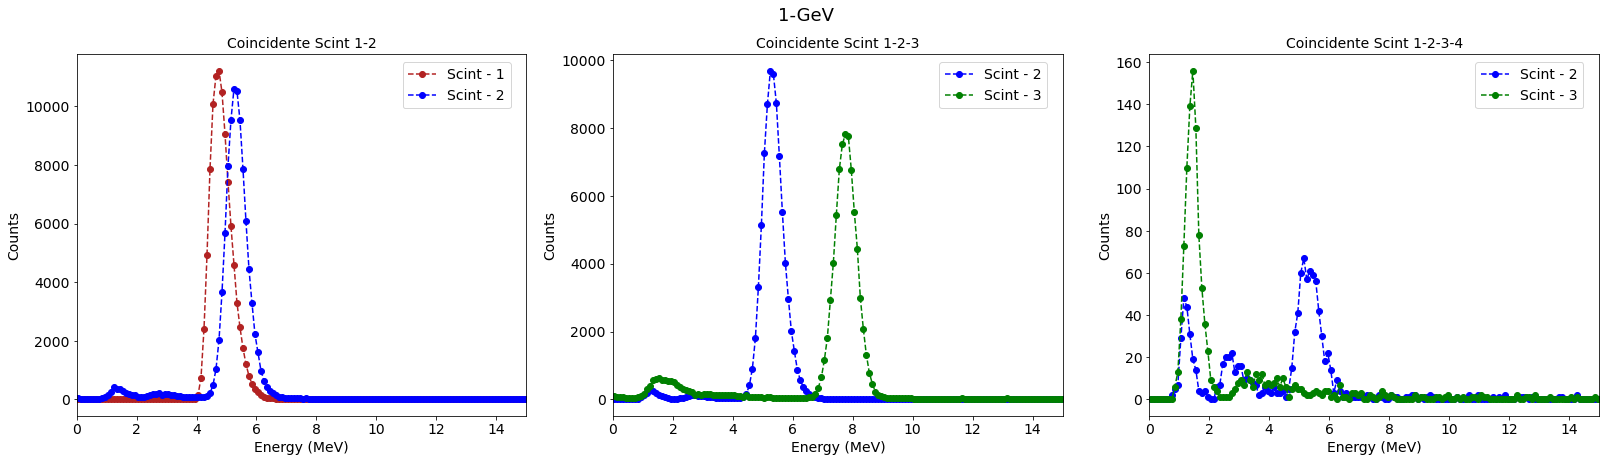

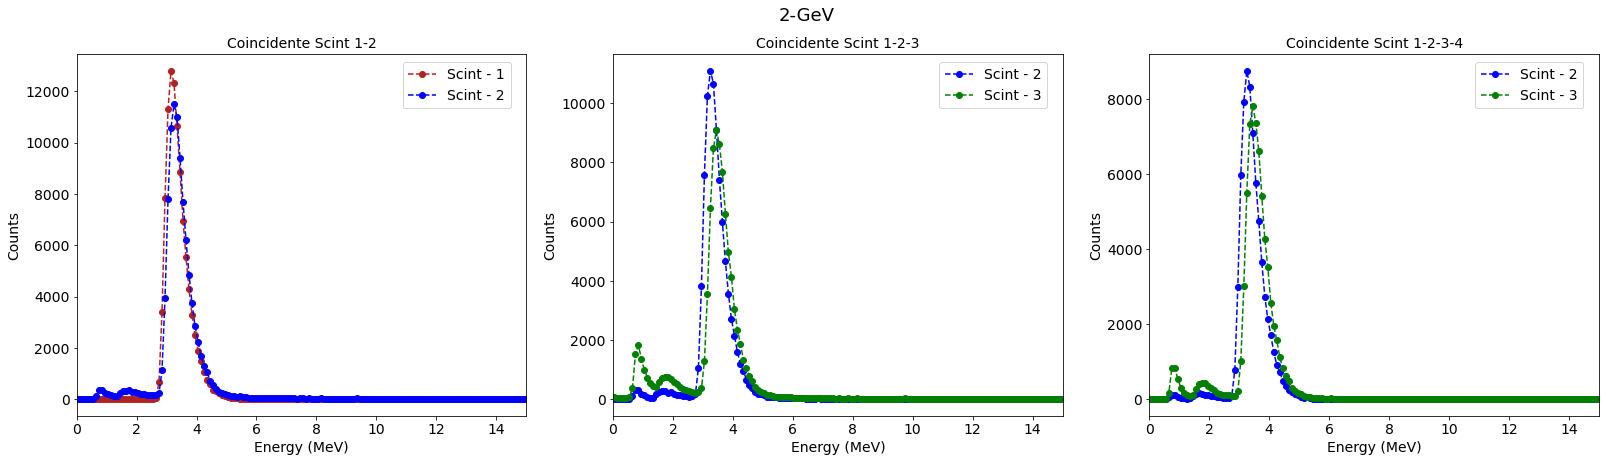

In [33]:
bins = np.array(pd.read_csv("he_4/beam/100-MeV/EDep1-Scint1-2.txt", 
                            header=None, sep=";")[0])

energy_names = ["100-MeV", "200-MeV", "300-MeV", "500-MeV", "700-MeV", "1-GeV", "2-GeV"]
c = ["firebrick", "blue", "blue", "green", "blue", "green"]
scints = ["Scint - 1", "Scint - 2", "Scint - 2", "Scint - 3", "Scint - 2", "Scint - 3"]
titles = ["Coincidente Scint 1-2", "Coincidente Scint 1-2-3", "Coincidente Scint 1-2-3-4"]

for name in energy_names:
    fig, axes = plt.subplots(1,3)
    
    edep_ls = ["EDep1-Scint1-2", "EDep2-Scint1-2", "EDep2-Scint1-2-3", "EDep3-Scint1-2-3",
                "EDep2-Scint1-2-3-4", "EDep3-Scint1-2-3-4"]

    fig.suptitle("{}".format(name), fontsize = 18)
    for i in range(0,3):
        edep_1_name = "he_4/beam/{}/{}.txt".format(name, edep_ls[2*i])
        
        edep_2_name = "he_4/beam/{}/{}.txt".format(name, edep_ls[2*i+1])

        edep_1 = np.array(pd.read_csv(edep_1_name, header=None, sep=";")[1])
        edep_2 = np.array(pd.read_csv(edep_2_name, header=None, sep=";")[1])

        axes[i].set_xlim([0, 15])

        axes[i].set_xlabel("Energy (MeV)", fontsize=14)
        axes[i].set_ylabel("Counts", fontsize=14)

        axes[i].tick_params(axis='both', which='major', labelsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=14)
        
        axes[i].plot(bins, edep_1, "--o", color = c[2*i], label = scints[2*i])
        axes[i].plot(bins, edep_2, "--o", color = c[2*i+1], label = scints[2*i + 1])
        
        axes[i].set_title(titles[i], fontsize = 14)
        axes[i].legend(loc=(0.725,0.85), fontsize = 14)

    fig.set_size_inches(22.5, 6.5)
    fig.tight_layout()
    
plt.show()